**Business Case Overview**

Founded in 2015, Olist is a Brazilian B2B ECommerce marketplace that is leading the way as the no.1 commerce enabler for SMBs in Brazil (Crunchbase). Olist connects small businesses from all over Brazil to merchants with a single contract, those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners.

In this analysis, I take on the role of a data analytics consultant hired by Olist. With anonymized data from Olist, I provide actionable insights that help Olist improve its processes. 

This analysis is done in three parts based on Olist's business model:

1. Buyer Experience


2. Sales Transactions


3. Marketing Funnels (Sellers)



**Data Preparation**

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# read all csv files into dataframes

closed_deals = pd.read_csv('olist_closed_deals_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv', dtype={'customer_zip_code_prefix': 'object'})
geolocation = pd.read_csv('olist_geolocation_dataset.csv', dtype={'geolocation_zip_code_prefix': 'object'})
mql = pd.read_csv('olist_marketing_qualified_leads_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv', dtype={'seller_zip_code_prefix': 'object'})
translation = pd.read_csv('product_category_name_translation.csv')

In [3]:
# combine mlq and closed_deals by adding a 'deal_closed' column

mql['deal_closed'] = mql['mql_id'].isin(closed_deals['mql_id']).astype(int)

funnel = pd.merge(mql, closed_deals, on='mql_id', how='left')
funnel.head(10)

,mql_id,first_contact_date,landing_page_id,origin,deal_closed,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,1,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
5,28bdfd5f057764b54c38770f95c69f2f,2018-01-14,22c29808c4f815213303f8933030604c,organic_search,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,126a0d10becbaafcb2e72ce6848cf32c,2018-05-15,6a110e795dd487f1cf8d7583671987af,email,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,f76136f54d14a3345951f25b7932366b,2018-05-24,d51b0d02f063ba1d053db6d97226eec3,email,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2f838cade4a6012a6cb1016d1d8d95ed,2017-11-10,aeac92c0f5ae22a04ed3b746cce3a1b6,organic_search,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7281942387a1a0c3f72a50a8b0bb0920,2017-12-25,88740e65d5d6b056e0cda098e1ea6313,social,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# convert first_contact_date and won_date from object to datetime

to_datetime = ['first_contact_date', 'won_date']
funnel[to_datetime] = funnel[to_datetime].apply(pd.to_datetime)
funnel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         8000 non-null   object        
 1   first_contact_date             8000 non-null   datetime64[ns]
 2   landing_page_id                8000 non-null   object        
 3   origin                         7940 non-null   object        
 4   deal_closed                    8000 non-null   int64         
 5   seller_id                      842 non-null    object        
 6   sdr_id                         842 non-null    object        
 7   sr_id                          842 non-null    object        
 8   won_date                       842 non-null    datetime64[ns]
 9   business_segment               841 non-null    object        
 10  lead_type                      836 non-null    object        
 11  lead_behaviour_pr

In [5]:
# calculate the number of days it took for deals to close, store the results in close_days column

funnel['close_days'] = (funnel['won_date']-funnel['first_contact_date']).dt.days
funnel.head()

,mql_id,first_contact_date,landing_page_id,origin,deal_closed,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,close_days
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,1,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,5.0


In [6]:
# compile sales data (orders, products etc) into one table

sales = pd.merge(orders, customers, on='customer_id', how='left')
sales.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,03149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,09195,santo andre,SP


In [7]:
geolocation.head(20)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,01037,-23.545621,-46.639292,sao paulo,SP
1,01046,-23.546081,-46.644820,sao paulo,SP
2,01046,-23.546129,-46.642951,sao paulo,SP
3,01041,-23.544392,-46.639499,sao paulo,SP
4,01035,-23.541578,-46.641607,sao paulo,SP
5,01012,-23.547762,-46.635361,são paulo,SP
6,01047,-23.546273,-46.641225,sao paulo,SP
7,01013,-23.546923,-46.634264,sao paulo,SP
8,01029,-23.543769,-46.634278,sao paulo,SP
9,01011,-23.547640,-46.636032,sao paulo,SP


In [8]:
# one zip code could have multiple sets of lat and lng, taking the mean since we only need to estimate distance

geolocation = geolocation.groupby('geolocation_zip_code_prefix').agg({'geolocation_lat':'mean', 'geolocation_lng':'mean'}).reset_index()
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,01001,-23.550190,-46.634024
1,01002,-23.548146,-46.634979
2,01003,-23.548994,-46.635731
3,01004,-23.549799,-46.634757
4,01005,-23.549456,-46.636733


In [9]:
# pull the customer_lat and customer_lng into sales table from geolocation

sales = pd.merge(sales, geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

In [10]:
sales = sales.drop('geolocation_zip_code_prefix', axis=1)
sales.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,03149,sao paulo,SP,-23.576983,-46.587161
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.177924,-44.660711
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.745150,-48.514783
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.774190,-35.271143
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,09195,santo andre,SP,-23.676370,-46.514627


In [11]:
sales.rename(columns={'geolocation_lat':'customer_lat','geolocation_lng':'customer_lng'}, inplace=True)

In [12]:
order_items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [13]:
sales = pd.merge(sales, order_items, on='order_id', how='left')

In [14]:
order_reviews.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [15]:
sales = pd.merge(sales, order_reviews, on='order_id', how='left')

In [16]:
sales.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
customer_unique_id               96096
customer_zip_code_prefix         14994
customer_city                     4119
customer_state                      27
customer_lat                     14837
customer_lng                     14837
order_item_id                       21
product_id                       32951
seller_id                         3095
shipping_limit_date              93318
price                             5968
freight_value                     6999
review_id                        98410
review_score                         5
review_comment_title              4527
review_comment_message           36159
review_creation_date               636
review_answer_timestamp  

In [17]:
products.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [18]:
sales = pd.merge(sales, products, on='product_id', how='left')

In [19]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114092 entries, 0 to 114091
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       114092 non-null  object 
 1   customer_id                    114092 non-null  object 
 2   order_status                   114092 non-null  object 
 3   order_purchase_timestamp       114092 non-null  object 
 4   order_approved_at              113930 non-null  object 
 5   order_delivered_carrier_date   112112 non-null  object 
 6   order_delivered_customer_date  110839 non-null  object 
 7   order_estimated_delivery_date  114092 non-null  object 
 8   customer_unique_id             114092 non-null  object 
 9   customer_zip_code_prefix       114092 non-null  object 
 10  customer_city                  114092 non-null  object 
 11  customer_state                 114092 non-null  object 
 12  customer_lat                  

In [20]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   object
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


In [21]:
sales = pd.merge(sales, sellers, on='seller_id', how='left')

In [22]:
# finding the lat and lng for sellers from the geolocation dataframe

sales = pd.merge(sales, geolocation, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

In [23]:
sales = sales.drop('geolocation_zip_code_prefix', axis=1)

In [24]:
sales.rename(columns={'geolocation_lat':'seller_lat','geolocation_lng':'seller_lng'}, inplace=True)

In [25]:
sales.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,03149,...,4.0,500.0,19.0,8.0,13.0,09350,maua,SP,-23.680729,-46.444238
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,-19.807681,-43.980427
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP,-21.363502,-48.229601
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,3.0,450.0,30.0,10.0,20.0,31842,belo horizonte,MG,-19.837682,-43.924053
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,09195,...,4.0,250.0,51.0,15.0,15.0,08752,mogi das cruzes,SP,-23.543395,-46.262086


In [26]:
# replace the Portugues names with English ones

sales = pd.merge(sales, translation, on='product_category_name', how='left')

In [27]:
sales = sales.drop('product_category_name', axis=1)

In [28]:
sales.rename(columns={'product_category_name_english':'product_category'}, inplace=True)

In [29]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114092 entries, 0 to 114091
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       114092 non-null  object 
 1   customer_id                    114092 non-null  object 
 2   order_status                   114092 non-null  object 
 3   order_purchase_timestamp       114092 non-null  object 
 4   order_approved_at              113930 non-null  object 
 5   order_delivered_carrier_date   112112 non-null  object 
 6   order_delivered_customer_date  110839 non-null  object 
 7   order_estimated_delivery_date  114092 non-null  object 
 8   customer_unique_id             114092 non-null  object 
 9   customer_zip_code_prefix       114092 non-null  object 
 10  customer_city                  114092 non-null  object 
 11  customer_state                 114092 non-null  object 
 12  customer_lat                  

In [30]:
# estimate the distance between buyers and sellers with the Haversine formula and store the results in 'distance' column

import math

def calculate_distance(lat1, lng1, lat2, lng2): 
    #convert degrees to radians
    lat1_rad = math.radians(lat1)
    lng1_rad = math.radians(lng1)
    lat2_rad = math.radians(lat2)
    lng2_rad = math.radians(lng2)
    
    # Haversine formula
    dlat = lat2_rad - lat1_rad
    dlng = lng2_rad - lng1_rad
    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlng/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    radius_earth = 6371 #km
    distance = radius_earth * c
    
    return distance


In [31]:
sales['distance'] = sales.apply(lambda row: calculate_distance(row['seller_lat'], row['seller_lng'], row['customer_lat'], row['customer_lng']), axis=1)

In [32]:
sales.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,product_category,distance
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,03149,...,19.0,8.0,13.0,09350,maua,SP,-23.680729,-46.444238,housewares,18.576110
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,19.0,13.0,19.0,31570,belo horizonte,SP,-19.807681,-43.980427,perfumery,851.495069
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,24.0,19.0,21.0,14840,guariba,SP,-21.363502,-48.229601,auto,514.410666
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,30.0,10.0,20.0,31842,belo horizonte,MG,-19.837682,-43.924053,pet_shop,1822.226336
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,09195,...,51.0,15.0,15.0,08752,mogi das cruzes,SP,-23.543395,-46.262086,stationery,29.676625


In [33]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114092 entries, 0 to 114091
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       114092 non-null  object 
 1   customer_id                    114092 non-null  object 
 2   order_status                   114092 non-null  object 
 3   order_purchase_timestamp       114092 non-null  object 
 4   order_approved_at              113930 non-null  object 
 5   order_delivered_carrier_date   112112 non-null  object 
 6   order_delivered_customer_date  110839 non-null  object 
 7   order_estimated_delivery_date  114092 non-null  object 
 8   customer_unique_id             114092 non-null  object 
 9   customer_zip_code_prefix       114092 non-null  object 
 10  customer_city                  114092 non-null  object 
 11  customer_state                 114092 non-null  object 
 12  customer_lat                  

In [34]:
# convert all the timestamp columns from object to timestamps

timestamp_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp']
sales[timestamp_columns] = sales[timestamp_columns].apply(pd.to_datetime)

In [35]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114092 entries, 0 to 114091
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114092 non-null  object        
 1   customer_id                    114092 non-null  object        
 2   order_status                   114092 non-null  object        
 3   order_purchase_timestamp       114092 non-null  datetime64[ns]
 4   order_approved_at              113930 non-null  datetime64[ns]
 5   order_delivered_carrier_date   112112 non-null  datetime64[ns]
 6   order_delivered_customer_date  110839 non-null  datetime64[ns]
 7   order_estimated_delivery_date  114092 non-null  datetime64[ns]
 8   customer_unique_id             114092 non-null  object        
 9   customer_zip_code_prefix       114092 non-null  object        
 10  customer_city                  114092 non-null  object        
 11  

In [36]:
sales.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,product_category,distance
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,03149,...,19.0,8.0,13.0,09350,maua,SP,-23.680729,-46.444238,housewares,18.576110
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,19.0,13.0,19.0,31570,belo horizonte,SP,-19.807681,-43.980427,perfumery,851.495069
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,24.0,19.0,21.0,14840,guariba,SP,-21.363502,-48.229601,auto,514.410666
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,30.0,10.0,20.0,31842,belo horizonte,MG,-19.837682,-43.924053,pet_shop,1822.226336
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,09195,...,51.0,15.0,15.0,08752,mogi das cruzes,SP,-23.543395,-46.262086,stationery,29.676625


In [37]:
# drop the lat and lng columns since we already calculated the distance

col_drop = ['seller_lat', 'seller_lng', 'customer_lat', 'customer_lng']
sales = sales.drop(col_drop, axis=1)
sales.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category,distance
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,03149,...,4.0,500.0,19.0,8.0,13.0,09350,maua,SP,housewares,18.576110
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,perfumery,851.495069
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP,auto,514.410666
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,3.0,450.0,30.0,10.0,20.0,31842,belo horizonte,MG,pet_shop,1822.226336
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,09195,...,4.0,250.0,51.0,15.0,15.0,08752,mogi das cruzes,SP,stationery,29.676625


In [38]:
# calculate the number of days between a purchase and actual delivery and store it in col 'fulfillment_days'

sales['fulfillment_days'] = (sales['order_delivered_customer_date']-sales['order_purchase_timestamp']).dt.days

In [39]:
# compare shipping_limit_date and order_delivered_carrier_date and store the results in 'delivered_carrier_ontime'

sales['delivered_carrier_ontime'] = (sales['shipping_limit_date']>sales['order_delivered_carrier_date']).astype(int)

In [40]:
# compare order_delivered_customer_date and order_estimated_delivery_date and store the results in 'delivered_customer_ontime'

sales['delivered_customer_ontime'] = (sales['order_estimated_delivery_date']>sales['order_delivered_customer_date']).astype(int)

In [41]:
# calculate days it takes for order to reach carrier after purchase and store it in 'days_to_carrier'

sales['days_to_carrier'] = (sales['order_delivered_carrier_date']-sales['order_purchase_timestamp']).dt.days

In [42]:
# calculate days it takes for order to reach customer after being delivered to carrier and store it in 'days_to_customer'

sales['days_to_customer'] = (sales['order_delivered_customer_date']-sales['order_delivered_carrier_date']).dt.days

In [43]:
# group product_category into bigger groups (ChatGPT grouped it for me)

sales['product_category'].unique()

array(['housewares', 'perfumery', 'auto', 'pet_shop', 'stationery', nan,
       'furniture_decor', 'office_furniture', 'garden_tools',
       'computers_accessories', 'bed_bath_table', 'toys',
       'construction_tools_construction', 'telephony', 'health_beauty',
       'electronics', 'baby', 'cool_stuff', 'watches_gifts',
       'air_conditioning', 'sports_leisure', 'books_general_interest',
       'small_appliances', 'food', 'luggage_accessories',
       'fashion_underwear_beach', 'christmas_supplies',
       'fashion_bags_accessories', 'musical_instruments',
       'construction_tools_lights', 'books_technical',
       'costruction_tools_garden', 'home_appliances', 'market_place',
       'agro_industry_and_commerce', 'party_supplies', 'home_confort',
       'cds_dvds_musicals', 'industry_commerce_and_business',
       'consoles_games', 'furniture_bedroom', 'construction_tools_safety',
       'fixed_telephony', 'drinks',
       'kitchen_dining_laundry_garden_furniture', 'fashion_sho

In [44]:
# create mapping

mapping={
'health_beauty': 'Beauty and Personal Care',
    'computers_accessories': 'Electronics and Computers',
    'auto': 'Automotive and Tools',
    'bed_bath_table': 'Home, Furniture and Appliances',
    'furniture_decor': 'Home, Furniture and Appliances',
    'sports_leisure': 'Sports and Leisure',
    'perfumery': 'Beauty and Personal Care',
    'housewares': 'Home, Furniture and Appliances',
    'telephony': 'Electronics and Computers',
    'watches_gifts': 'Fashion and Accessories',
    'food_drink': 'Food and Drinks',
    'baby': 'Baby and Kids',
    'stationery': 'Office and Stationery',
    'tablets_printing_image': 'Electronics and Computers',
    'toys': 'Fashion and Accessories',
    'fixed_telephony': 'Electronics and Computers',
    'garden_tools': 'Home, Furniture and Appliances',
    'fashion_bags_accessories': 'Fashion and Accessories',
    'small_appliances': 'Home, Furniture and Appliances',
    'consoles_games': 'Electronics and Computers',
    'audio': 'Electronics and Computers',
    'fashion_shoes': 'Fashion and Accessories',
    'cool_stuff': 'Others',
    'luggage_accessories': 'Fashion and Accessories',
    'air_conditioning': 'Home, Furniture and Appliances',
    'construction_tools_construction': 'Automotive and Tools',
    'kitchen_dining_laundry_garden_furniture': 'Home, Furniture and Appliances',
    'costruction_tools_garden': 'Automotive and Tools',
    'fashion_male_clothing': 'Fashion and Accessories',
    'pet_shop': 'Others',
    'office_furniture': 'Office and Stationery',
    'market_place': 'Others',
    'electronics': 'Electronics and Computers',
    'home_appliances': 'Home, Furniture and Appliances',
    'party_supplies': 'Books and Entertainment',
    'home_confort': 'Home, Furniture and Appliances',
    'costruction_tools_tools': 'Automotive and Tools',
    'agro_industry_and_commerce': 'Others',
    'furniture_mattress_and_upholstery': 'Home, Furniture and Appliances',
    'books_technical': 'Books and Entertainment',
    'home_construction': 'Home, Furniture and Appliances',
    'musical_instruments': 'Books and Entertainment',
    'furniture_living_room': 'Home, Furniture and Appliances',
    'construction_tools_lights': 'Automotive and Tools',
    'industry_commerce_and_business': 'Others',
    'food': 'Food and Drinks',
    'art': 'Books and Entertainment',
    'furniture_bedroom': 'Home, Furniture and Appliances',
    'books_general_interest': 'Books and Entertainment',
    'construction_tools_safety': 'Automotive and Tools',
    'fashion_underwear_beach': 'Fashion and Accessories',
    'fashion_sport': 'Fashion and Accessories',
    'signaling_and_security': 'Home, Furniture and Appliances',
    'computers': 'Electronics and Computers',
    'christmas_supplies': 'Books and Entertainment',
    'fashio_female_clothing': 'Fashion and Accessories',
    'home_appliances_2': 'Home, Furniture and Appliances',
    'books_imported': 'Books and Entertainment',
    'drinks': 'Food and Drinks',
    'cds_dvds_musicals': 'Books and Entertainment',
    'cine_photo': 'Books and Entertainment',
    'la_cuisine': 'Food and Drinks',
    'flowers': 'Others',
    'home_comfort_2': 'Home, Furniture and Appliances',
    'small_appliances_home_oven_and_coffee': 'Home, Furniture and Appliances',
    'dvds_blu_ray': 'Books and Entertainment',
    'diapers_and_hygiene': 'Baby and Kids',
    'fashion_childrens_clothes': 'Baby and Kids',
    'music': 'Books and Entertainment',
    'arts_and_craftmanship': 'Books and Entertainment',
    'security_and_services': 'Home, Furniture and Appliances'
}

sales['product_category']=sales['product_category'].replace(mapping)
sales['product_category']=sales['product_category'].fillna('Others')
sales['product_category'].unique()

array(['Home, Furniture and Appliances', 'Beauty and Personal Care',
       'Automotive and Tools', 'Others', 'Office and Stationery',
       'Electronics and Computers', 'Fashion and Accessories',
       'Baby and Kids', 'Sports and Leisure', 'Books and Entertainment',
       'Food and Drinks'], dtype=object)

In [45]:
# do the same to funnel

funnel_mapping={
'pet': 'Others',
'car_accessories': 'Automotive and Tools',
'home_appliances': 'Home, Furniture and Appliances',
'food_drink': 'Food and Drinks',
'health_beauty': 'Beauty and Personal Care',
'computers': 'Electronics and Computers',
'household_utilities': 'Home, Furniture and Appliances',
'construction_tools_house_garden': 'Home, Furniture and Appliances',
'toys': 'Fashion and Accessories',
'sports_leisure': 'Sports and Leisure',
'stationery': 'Office and Stationery',
'food_supplement': 'Food and Drinks',
'home_decor': 'Home, Furniture and Appliances',
'bed_bath_table': 'Home, Furniture and Appliances',
'watches': 'Fashion and Accessories',
'fashion_accessories': 'Fashion and Accessories',
'jewerly': 'Fashion and Accessories',
'party': 'Books and Entertainment',
'small_appliances': 'Home, Furniture and Appliances',
'audio_video_electronics': 'Electronics and Computers',
'other': 'Others',
'bags_backpacks': 'Fashion and Accessories',
'home_office_furniture': 'Home, Furniture and Appliances',
'music_instruments': 'Books and Entertainment',
'books': 'Books and Entertainment',
'baby': 'Baby and Kids',
'air_conditioning': 'Home, Furniture and Appliances',
'phone_mobile': 'Electronics and Computers',
'handcrafted': 'Books and Entertainment',
'perfume': 'Beauty and Personal Care',
'gifts': 'Fashion and Accessories',
'religious': 'Others',
'games_consoles': 'Electronics and Computers'
}

funnel['business_segment']=funnel['business_segment'].replace(funnel_mapping)

In [46]:
funnel.head()

,mql_id,first_contact_date,landing_page_id,origin,deal_closed,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,close_days
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,1,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,Others,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,5.0


In [47]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114092 entries, 0 to 114091
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114092 non-null  object        
 1   customer_id                    114092 non-null  object        
 2   order_status                   114092 non-null  object        
 3   order_purchase_timestamp       114092 non-null  datetime64[ns]
 4   order_approved_at              113930 non-null  datetime64[ns]
 5   order_delivered_carrier_date   112112 non-null  datetime64[ns]
 6   order_delivered_customer_date  110839 non-null  datetime64[ns]
 7   order_estimated_delivery_date  114092 non-null  datetime64[ns]
 8   customer_unique_id             114092 non-null  object        
 9   customer_zip_code_prefix       114092 non-null  object        
 10  customer_city                  114092 non-null  object        
 11  

**Data Analysis - 1. Buyer Experience**

A study done by NorthWestern suggests that the sweet spot for reviews are 4.2-4.5, for this analysis, we define satisfactory as anything above 4
Two crucial aspects to buyer experience are product satisfaction and delivery satisfaction, we will segment orders by review score (satifactory/non satisfactory) and analyze their delivery times and products

In [48]:
# use dataframe orders to analyze data by order, add column for satisfaction status; if review_score>=4 then 1 else 0, filter for delivered orders only

orders=sales.groupby(['order_id','order_status','order_purchase_timestamp','delivered_customer_ontime'])[['price','freight_value','review_score','order_item_id','seller_id','fulfillment_days']].agg({'price':'sum','freight_value':'sum','review_score':
                                                                                                                     'mean','order_item_id':'max','fulfillment_days':'mean'}).reset_index()
                                                                                                            
orders['satisfied']=orders['review_score'].apply(lambda x: 1 if x>=4 else 0).astype(bool)
orders['freight_pct']=(orders['freight_value']/(orders['price']+orders['freight_value']))*100
orders=orders[orders['order_status']=='delivered']

In [49]:
# Monthly satisfaction rate

monthly_satisfaction=orders.groupby([orders['order_purchase_timestamp'].dt.to_period('M'),orders['satisfied']])['satisfied'].count()
monthly_totals=orders.groupby(orders['order_purchase_timestamp'].dt.to_period('M'))['satisfied'].count()
satisfaction_rate=monthly_satisfaction.loc[:,True]/monthly_totals*100
satisfaction_rate

order_purchase_timestamp
2016-09           NaN
2016-10     74.716981
2016-12    100.000000
2017-01     78.800000
2017-02     78.826376
2017-03     79.104478
2017-04     77.724707
2017-05     80.315849
2017-06     79.904306
2017-07     80.707645
2017-08     83.090866
2017-09     81.542169
2017-10     79.968736
2017-11     73.535464
2017-12     76.510067
2018-01     76.361579
2018-02     70.617849
2018-03     69.098958
2018-04     80.141218
2018-05     80.841606
2018-06     82.964420
2018-07     82.951778
2018-08     83.215242
Freq: M, Name: satisfied, dtype: float64

In [50]:
# On-time delivery rate (monthly)

ontime_delivery=orders.groupby([orders['order_purchase_timestamp'].dt.to_period('M'),orders['delivered_customer_ontime']])['delivered_customer_ontime'].count()
delivery_total=orders.groupby(orders['order_purchase_timestamp'].dt.to_period('M'))['delivered_customer_ontime'].count()
ontime_rate=ontime_delivery.loc[:,1]/delivery_total*100
ontime_rate

order_purchase_timestamp
2016-09           NaN
2016-10     98.867925
2016-12    100.000000
2017-01     96.933333
2017-02     96.793708
2017-03     94.422624
2017-04     92.140686
2017-05     96.362098
2017-06     96.140351
2017-07     96.565083
2017-08     96.684951
2017-09     94.795181
2017-10     94.707459
2017-11     85.677048
2017-12     91.619808
2018-01     93.436130
2018-02     84.012204
2018-03     78.637727
2018-04     94.689615
2018-05     91.761742
2018-06     98.589933
2018-07     95.470044
2018-08     89.607936
Freq: M, Name: delivered_customer_ontime, dtype: float64

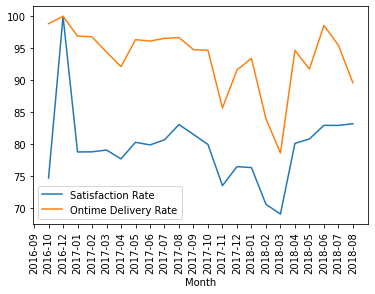

In [51]:
plt.plot(satisfaction_rate.index.astype(str), satisfaction_rate, label='Satisfaction Rate')
plt.plot(ontime_rate.index.astype(str), ontime_rate, label='Ontime Delivery Rate')
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.legend()
plt.show()

Satisfaction rate and ontime delivery rate seem to follow the same pattern - customers tend to be more satisfied when their orders are delivered no later than estimated delivery date

In [52]:
# % of freight value - divide them into buckets and look at average review scores across buckets

bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
orders['freight%_bins']=pd.cut(orders['freight_pct'], bins, labels=False, right=False)
orders.groupby(['freight%_bins'])[['review_score','order_id','freight_value','price']].agg({'review_score':'mean','order_id':'count','freight_value':'mean','price':'mean'})

,review_score,order_id,freight_value,price
freight%_bins,,,,
0,4.207084,18146,19.941349,340.891536
1,4.166605,35275,21.464043,127.608853
2,4.138062,23216,24.492561,76.780555
3,4.129440,11616,25.844397,49.757246
4,4.120336,5150,25.511412,32.232278
5,4.057542,2194,26.633336,22.708614
6,3.977712,679,34.907320,19.695155
7,3.989071,184,41.105272,14.819783
8,3.750000,16,55.131875,11.155000


Average review scores start to drop below satisfactory from bin 6 (60%-70%), with bin 9 being an outlier since there are only two orders and the prices were very low.

Beyond 0-20%, customers tend to order less, average freight value goes up, however average order price goes down.

Logically, customers should not be paying more in shipping for orders that cost less, such pricing is associated with less orders and lower satisfaction.

Recommendation: draw the line at bin 6, which means that shipping costs should not be more than 60% of total order size


**Data Analysis - 2. Sales Transactions**

In [53]:
# Gross Transaction Value, Number of Transactions and Average Order Value by category

sales_cat=sales.groupby([sales['order_purchase_timestamp'].dt.to_period('M'),sales['product_category']])['price'].sum().sort_values(ascending=False).reset_index()
sales_total=sales_cat['price'].sum()
transact_no_cat=sales.groupby([sales['order_purchase_timestamp'].dt.to_period('M'),sales['product_category']])['order_id'].count().reset_index()
sales_cat=pd.merge(sales_cat, transact_no_cat, on=['product_category','order_purchase_timestamp'])
sales_cat['avg_order_val']=sales_cat['price']/sales_cat['order_id']
sales_cat=sales_cat.rename(columns={'price':'gross_transaction_value','order_id':'number_of_orders'})

In [54]:
# Number of Sellers by Category

seller_cat=sales.groupby([sales['order_purchase_timestamp'].dt.to_period('M'),sales['product_category']])['seller_id'].nunique().sort_values(ascending=False).reset_index()
sales_cat=pd.merge(sales_cat, seller_cat, on=['product_category','order_purchase_timestamp'], how='left')

sales_cat=sales_cat.rename(columns={'seller_id':'number_of_sellers'})
sales_cat.sort_values(by=['order_purchase_timestamp','product_category'])

,order_purchase_timestamp,product_category,gross_transaction_value,number_of_orders,avg_order_val,number_of_sellers
230,2016-09,Beauty and Personal Care,134.97,3,44.990000,1
233,2016-09,Electronics and Computers,59.50,1,59.500000,1
232,2016-09,"Home, Furniture and Appliances",72.89,2,36.445000,1
236,2016-09,Others,0.00,1,0.000000,0
217,2016-10,Automotive and Tools,1833.25,12,152.770833,11
...,...,...,...,...,...,...
96,2018-08,Others,54023.24,456,118.472018,142
99,2018-08,Sports and Leisure,51537.09,476,108.271197,153
229,2018-09,"Home, Furniture and Appliances",145.00,1,145.000000,1
237,2018-09,Others,0.00,15,0.000000,0


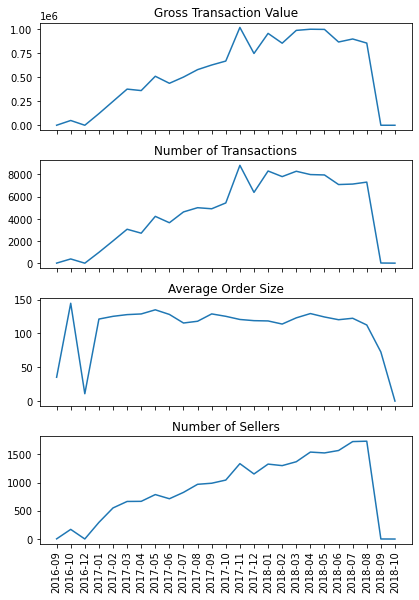

In [55]:
# Gross Transaction Value, number of transactions, average order size, by month

monthly_gross_transact_val=sales_cat.groupby(sales_cat['order_purchase_timestamp'])['gross_transaction_value'].sum()
num_transact=sales_cat.groupby(sales_cat['order_purchase_timestamp'])['number_of_orders'].sum()                                                            
avg_order_size=sales_cat.groupby(sales_cat['order_purchase_timestamp'])['avg_order_val'].mean()
num_sellers=sales_cat.groupby(sales_cat['order_purchase_timestamp'])['number_of_sellers'].sum()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,sharex=True,figsize=(6,8))

ax1.plot(monthly_gross_transact_val.index.astype(str), monthly_gross_transact_val)
ax1.set_title('Gross Transaction Value')

ax2.plot(num_transact.index.astype(str), num_transact)
ax2.set_title('Number of Transactions')

ax3.plot(avg_order_size.index.astype(str), avg_order_size)
ax3.set_title('Average Order Size')

ax4.plot(num_sellers.index.astype(str), num_sellers)
ax4.set_title('Number of Sellers')

plt.tight_layout()
plt.xticks(rotation=90)


plt.show()

Number of transaction seems to be associated with gross transaction value, while average order size does not seem to fluctuate much

In [56]:
# top earning categories

sales_cat.groupby('product_category')['gross_transaction_value'].sum().sort_values(ascending=False)

product_category
Home, Furniture and Appliances    3704138.26
Fashion and Accessories           2034072.89
Electronics and Computers         1902709.73
Beauty and Personal Care          1663351.48
Others                            1179406.23
Sports and Leisure                 993656.51
Automotive and Tools               863398.70
Office and Stationery              506524.70
Baby and Kids                      414254.91
Books and Entertainment            321185.29
Food and Drinks                     69224.77
Name: gross_transaction_value, dtype: float64

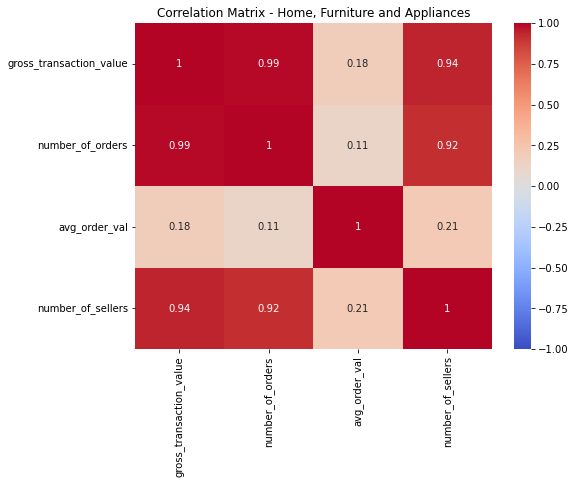

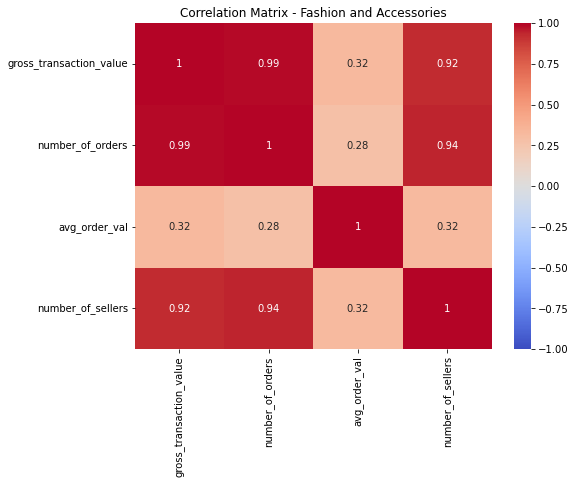

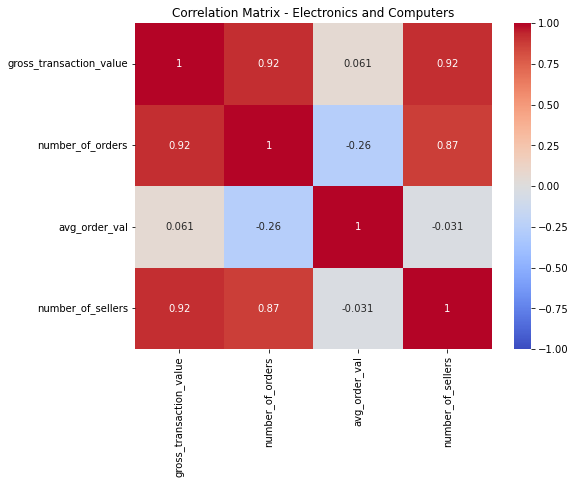

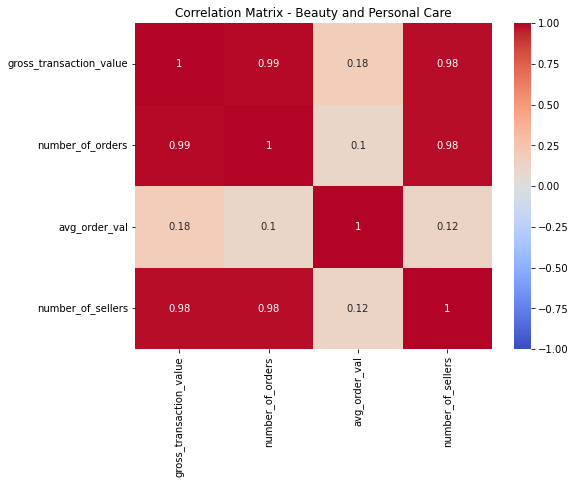

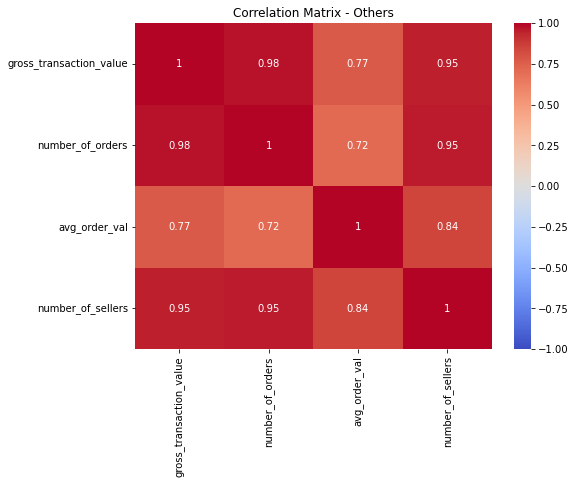

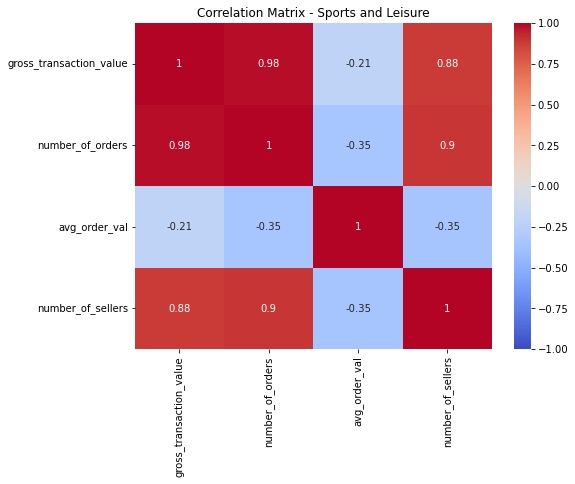

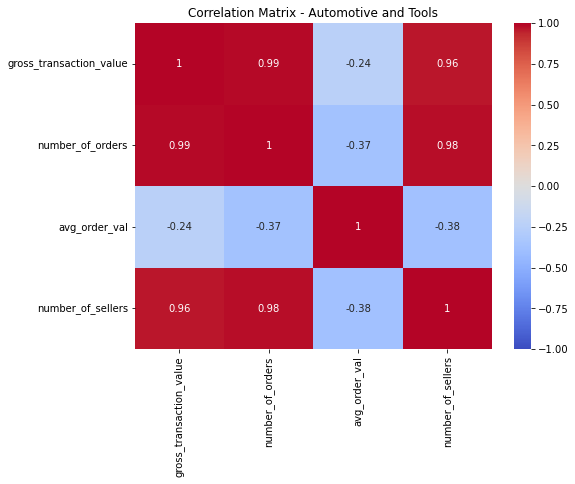

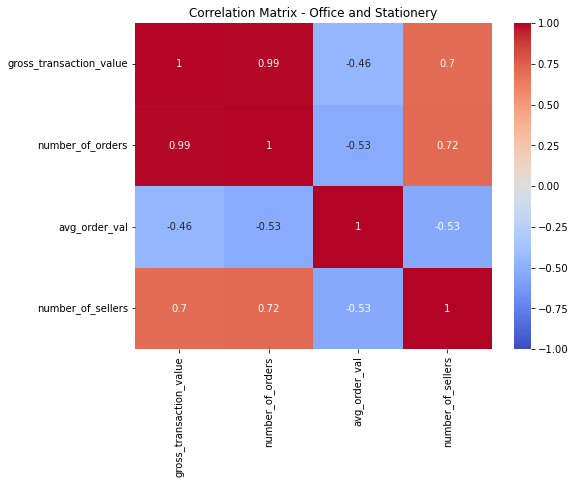

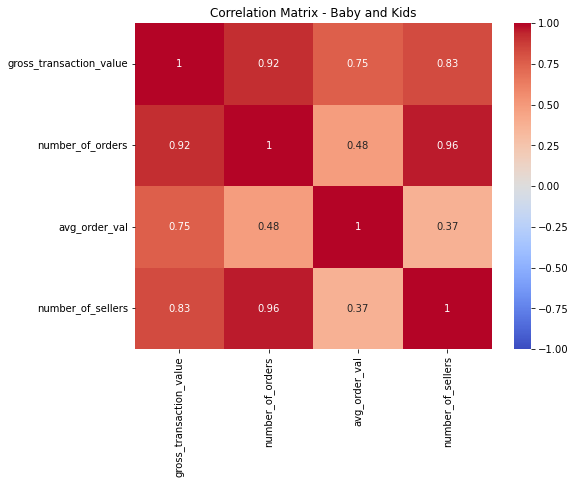

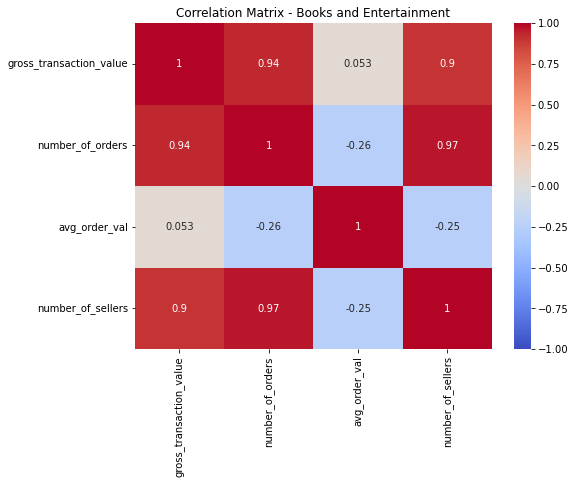

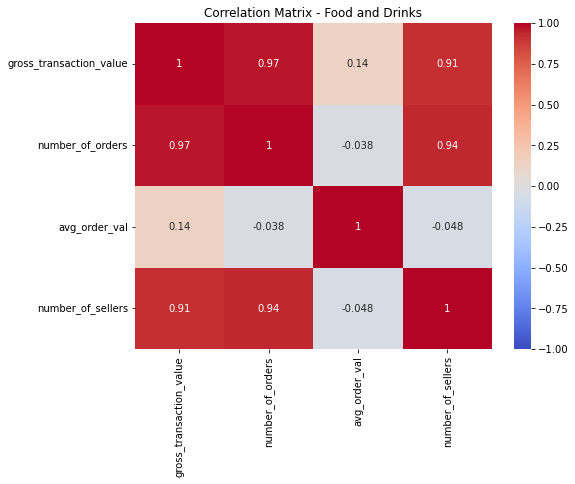

In [57]:
for category in sales_cat['product_category'].unique():
    df_category=sales_cat[sales_cat['product_category']==category]
    correlation=df_category[['gross_transaction_value','number_of_orders','avg_order_val','number_of_sellers']].corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix - {category}')
    plt.show()

Gross transaction value is heavily correlated to number of orders and number of sellers in the top revenue generating categories:

1. The higher the transaction volumn (number of orders), the higher the gross transaction value;
2. The more sellers, the more supply, the higher the transaction volumn, the higher the gross transaction value.

Acquiring more sellers (at low costs), especially in our top revenue-generating categories, are therefore crucial to the business' bottom line.

**Data Analysis - 3. Marketing Funnel (Sellers)**

Main goal of the marketing funnel: 
- To acquire mql and ultimately close the deal with the least amount of resources possible, with a focus on top revenue-generating category sellers (for maximum impact on revenue)

Main questions to answer:
1. Source: through which channel (origin) did the mql find us; which origins have higher conversion rates
2. Business Segments: are we closing deals with businesses in segments that are important to us?
3. Close time: how long does it take to close a deal

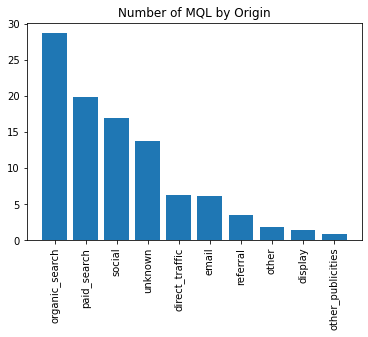

In [58]:
# investigate mql sources by %

mql_origin=funnel.groupby(['origin'])['mql_id'].count().sort_values(ascending=False).reset_index()
mql_total=funnel['mql_id'].count()
mql_origin['mql_pct']=mql_origin['mql_id']/mql_total*100
mql_origin=mql_origin.rename(columns={'mql_id': 'mql_num'})
plt.bar(mql_origin['origin'], mql_origin['mql_pct'])
plt.xticks(rotation=90)
plt.title('Number of MQL by Origin')
plt.show()

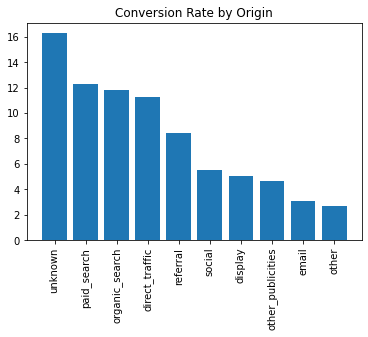

In [59]:
# conversion rates by origin

origin_cr=funnel.groupby(['origin'])['deal_closed'].sum()/funnel.groupby(['origin'])['deal_closed'].count()*100
origin_cr=origin_cr.reset_index()
origin_cr=origin_cr.rename(columns={'deal_closed':'conversion_rate'})
origin_cr=pd.merge(mql_origin, origin_cr, on='origin', how='inner')
origin_cr=origin_cr.sort_values(by='conversion_rate', ascending=False)
plt.bar(origin_cr['origin'], origin_cr['conversion_rate'])
plt.xticks(rotation=90)
plt.title('Conversion Rate by Origin')
plt.show()

Text(0.5, 1.0, 'Monthly Number of MQL by Origin')

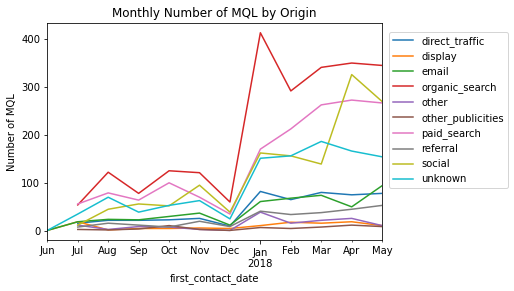

In [60]:
# analyze mql volumn by month and origin

mql_monthly=funnel.groupby([funnel['origin'],funnel['first_contact_date'].dt.to_period('M')])['mql_id'].count().reset_index()
mql_monthly_pivot=pd.pivot_table(mql_monthly, values='mql_id', index='first_contact_date', columns='origin', aggfunc='sum')
mql_monthly_pivot.plot(kind='line')
plt.legend(loc='center right', bbox_to_anchor=(1.39, 0.6))
plt.ylabel('Number of MQL')
plt.title('Monthly Number of MQL by Origin')

Text(0.5, 1.0, 'Monthly Conversion Rate by Origin')

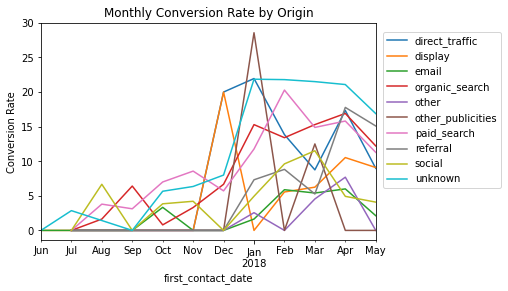

In [61]:
# analyze conversion rate by month and origin

cr_monthly=funnel.groupby([funnel['origin'], funnel['first_contact_date'].dt.to_period('M')])['deal_closed'].sum()/funnel.groupby([funnel['origin'], funnel['first_contact_date'].dt.to_period('M')])['mql_id'].count()*100
cr_monthly=cr_monthly.reset_index()
cr_monthly=cr_monthly.rename(columns={0: 'conversion_rate'})
cr_monthly_pivot=pd.pivot_table(cr_monthly, values='conversion_rate', index='first_contact_date', columns='origin', aggfunc='sum')
cr_monthly_pivot.plot(kind='line')
plt.legend(loc='center right', bbox_to_anchor=(1.39, 0.6))
plt.ylabel('Conversion Rate')
plt.title('Monthly Conversion Rate by Origin')

Text(0.5, 1.0, 'Average Close Days by Origins')

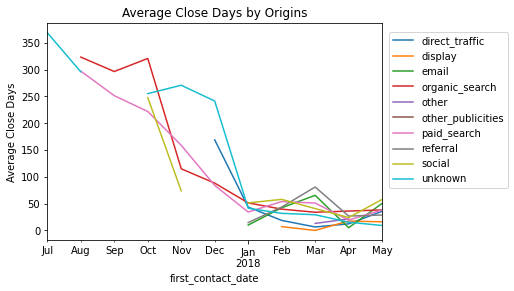

In [62]:
# analyze days it takes to close a deal by origins and over time

close_origin=funnel.groupby([funnel['first_contact_date'].dt.to_period('M'), funnel['origin']])['close_days'].mean().reset_index()
close_origin_pivot=pd.pivot_table(close_origin, values='close_days', index='first_contact_date', columns='origin')
close_origin_pivot.plot()
plt.legend(loc='center right', bbox_to_anchor=(1.39, 0.6))
plt.ylabel('Average Close Days')
plt.title('Average Close Days by Origins')

Text(0.5, 1.0, 'Number of Closed Deals by Category')

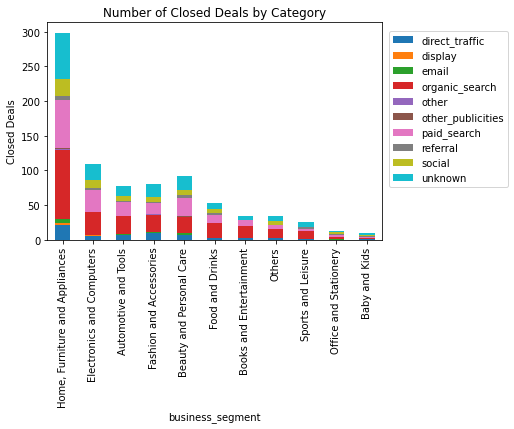

In [63]:
# analyze number of closed deals by category and their traffic sources - the priority should be on top earning categories

segment_origin=funnel[funnel['deal_closed']==1].groupby(['business_segment','origin'])['mql_id'].count().sort_values(ascending=False).reset_index()
segment_origin_pivot=pd.pivot_table(segment_origin, values='mql_id', index='business_segment', columns='origin').sort_values(by='organic_search', ascending=False)
segment_origin_pivot.plot(kind='bar', stacked=True)
plt.legend(loc='center right', bbox_to_anchor=(1.39, 0.6))
plt.ylabel('Closed Deals')
plt.title('Number of Closed Deals by Category')

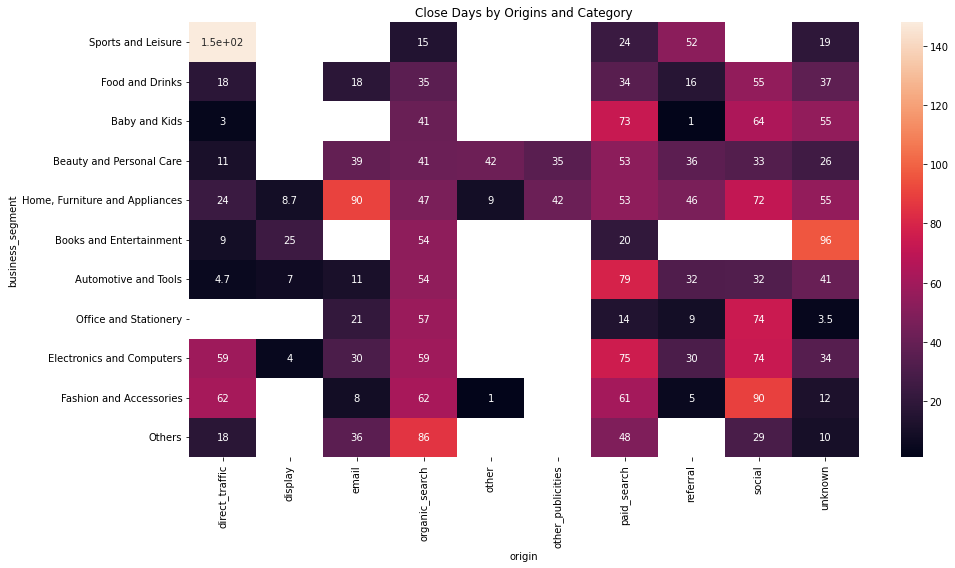

In [64]:
# analyze days it takes to close a deal by origins and by category

close_days=funnel.groupby(['origin','business_segment'])['close_days'].mean().sort_values(ascending=False).reset_index()
close_days_pivot=pd.pivot_table(close_days, values='close_days', index='business_segment', columns='origin')
close_days_pivot=close_days_pivot.sort_values(by='organic_search', ascending=True)
plt.figure(figsize=(15, 8))
sns.heatmap(close_days_pivot, annot=True)
plt.title('Close Days by Origins and Category')
plt.show()


Text(0.5, 1.0, 'Number of Close Deals by Lead Behaviour Profile and Origin')

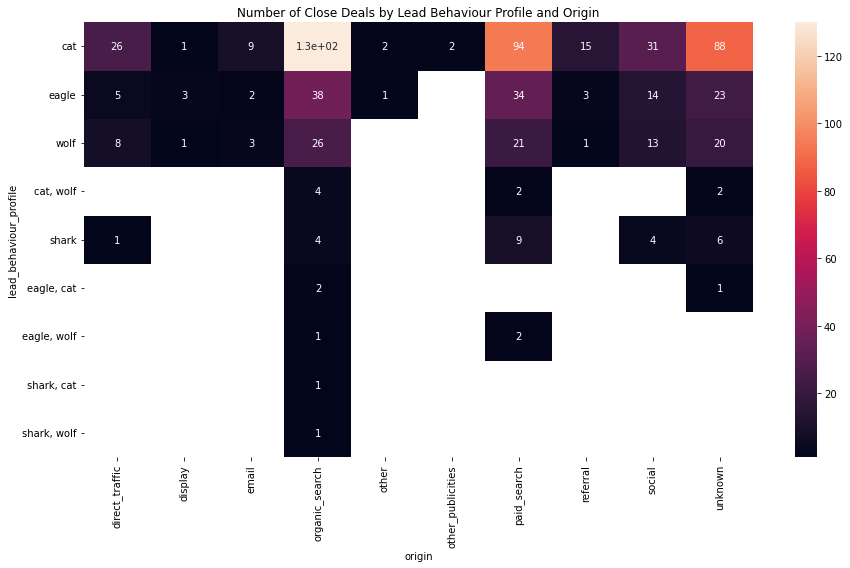

In [65]:
# analyze traffic source (origin) and lead behaviour type

origin_lead=funnel.groupby(['origin', 'lead_behaviour_profile'])['seller_id'].count().reset_index()
origin_lead_pivot=pd.pivot_table(origin_lead, values='seller_id', index='lead_behaviour_profile', columns='origin')
origin_lead_pivot=origin_lead_pivot.sort_values(by='organic_search', ascending=False)
plt.figure(figsize=(15, 8))
sns.heatmap(origin_lead_pivot, annot=True)
plt.title('Number of Close Deals by Lead Behaviour Profile and Origin')

Text(0.5, 1.0, 'Number of Closed Deals by Lead Behaviour and Segment')

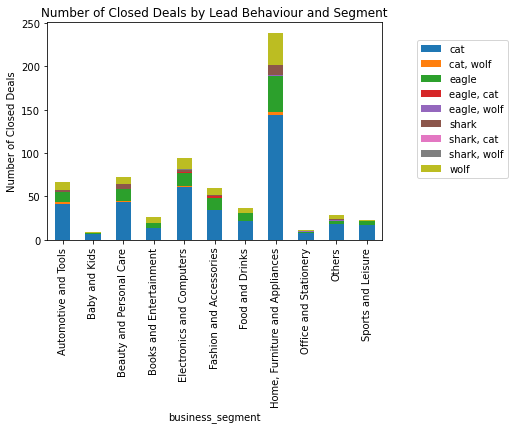

In [66]:
# analyze number of closed deals by lead behaviour type and segment

behaviour_segment=funnel.groupby(['business_segment','lead_behaviour_profile'])['seller_id'].count().sort_values(ascending=False).reset_index()
behaviour_segment_pivot=pd.pivot_table(behaviour_segment, values='seller_id', index='business_segment', columns='lead_behaviour_profile')
behaviour_segment_pivot.plot(kind='bar', stacked=True)
plt.legend(loc='center right', bbox_to_anchor=(1.39, 0.6))
plt.ylabel('Number of Closed Deals')
plt.title('Number of Closed Deals by Lead Behaviour and Segment')

Text(0.5, 1.0, 'Number of Close Deals by Lead Behaviour Type and SDR')

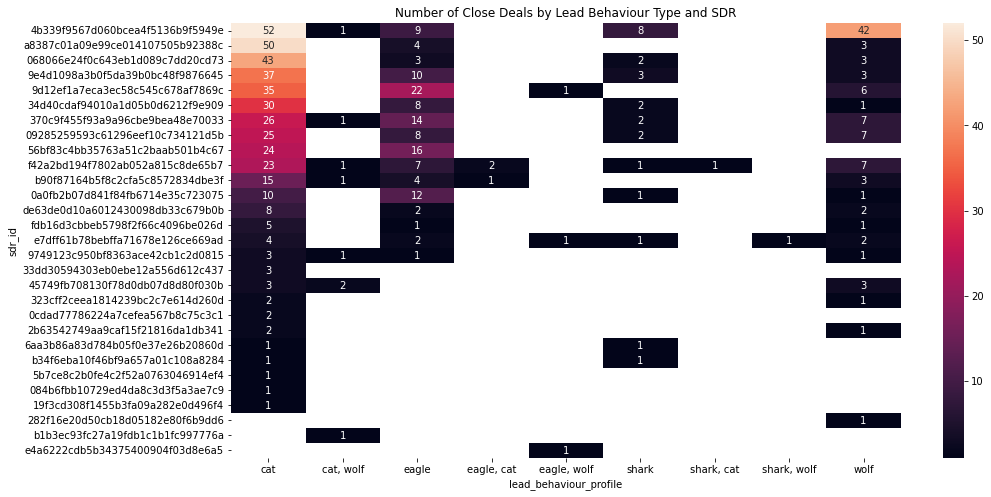

In [67]:
# analyze number of closed deals by lead behaviour profile and by sdr

lead_beh_sdr=funnel.groupby(['lead_behaviour_profile','sdr_id'])['seller_id'].count().sort_values(ascending=False).reset_index()
lead_beh_sdr_pivot=pd.pivot_table(lead_beh_sdr, values='seller_id', index='sdr_id', columns='lead_behaviour_profile')
lead_beh_sdr_pivot=lead_beh_sdr_pivot.sort_values(by='cat', ascending=False)
plt.figure(figsize=(15, 8))
sns.heatmap(lead_beh_sdr_pivot, annot=True)
plt.title('Number of Close Deals by Lead Behaviour Type and SDR')

Text(0.5, 1.0, 'Number of Close Deals by Lead Behaviour Profile and SR')

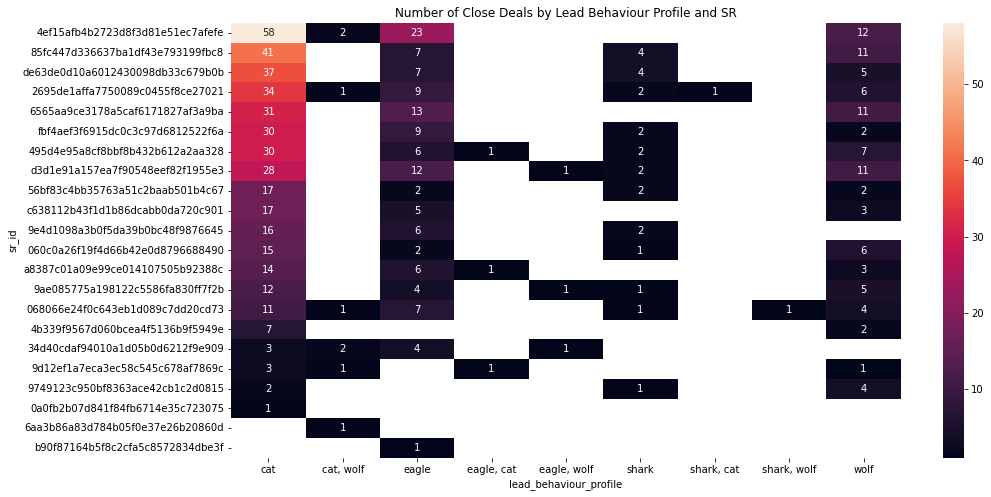

In [68]:
# analyze number of closed deals by lead behaviour profile and by sr

lead_beh_sdr=funnel.groupby(['lead_behaviour_profile','sr_id'])['seller_id'].count().sort_values(ascending=False).reset_index()
lead_beh_sdr_pivot=pd.pivot_table(lead_beh_sdr, values='seller_id', index='sr_id', columns='lead_behaviour_profile')
lead_beh_sdr_pivot=lead_beh_sdr_pivot.sort_values(by='cat', ascending=False)
plt.figure(figsize=(15, 8))
sns.heatmap(lead_beh_sdr_pivot, annot=True)
plt.title('Number of Close Deals by Lead Behaviour Profile and SR')

**Marketing Funnel**

1. General MQL and closed deals Volumn
- The largest number of closed deals are with businesses in our top-selling category - Home furniture and applicance, which is an indicator that our marketing efforts on that front are in line with our business reality.
- There is room for improvement when it comes to number of closed deals for businesses in other top-selling categories, namely "Fashion and accesories", "Electronics and Computers" and "Beauty and Personal Care"

2. By Traffic Source (Origin)
- Organic search and paid search are the company's bread and butter
- There's been a surge in MQLs from 'social' but same surge is not seen in conversion rate for 'social', possibly indicating an undesirable ROI.
- Our strategy should be to focus our resources on the traffic sources that attract the largest number of potential clients who are the most easily-convertible (measured by number of days to close a deal). 
  Among business segments/categories we should be focusing on (top revenue-generating categories): 
  for "Home furniture and appliances", we should focus on Organice Search (meaning SEO efforts); 
  for "Fashion and accesories", there should be more focus on organic search even if paid search has a slightly lower number of close days (1 less day), because of volumn
  for "Electronics and Computers", we should focus on organic search (SEO)
  for "Beauty and Personal Care", we should focus on organic search.
- Limitation: there should be more visibility into the "Unknown" origin, it is showing relatively high conversion rate and attracts relatively large number of MQLs, additionally for "Fashion and accesories", "Electronics and Computers" and "Beauty and Personal Care" categories it is taking less days to close deals. 

3. Lead Behaviour Profile (closed deals)
- By volumn, across categories, we come across "cat" the most often, followed by "eagle", "wolf" and "shark"
- SDR:
  SDR -949e is the best at handling cat and exceptional at handling wolf (they are the only person good at this it seems)
  SDR -388c and -cd73 are great at handling cat as well
  SDR -869c is exceptional at handling eagle
- SR:
  SR -fefe is the best at handling cat and eagle
- It is recommended to have SDR -949e train the SDR team on effectively handling cat and wolf, and have -869c train the team at handling eagle
- It is recommended to have SR -fefe train the SR team on effectively handling cat and eagle
- It is recommended to train the SDR team on effectively handling shark with external training/consultants
- It is recommended to train the SR team on effectively handling wolf and shark with external training/consultants



  